In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


In [2]:
DATADIR = r"C:\Users\nayan\Desktop\datasets\dog&cat\training_set\training_set"
CATEGORIES = ["dogs", "cats"]

In [3]:
IMG_SIZE = 100

In [4]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [5]:
random.shuffle(training_data)

In [6]:
training_data

[[array([[190, 193, 198, ..., 205, 200, 191],
         [176, 180, 173, ..., 209, 199, 196],
         [151, 151, 163, ..., 228, 199, 199],
         ...,
         [129, 107,  90, ..., 105, 111, 104],
         [150, 121, 165, ..., 117, 127, 137],
         [100, 113, 143, ..., 109, 140, 119]], dtype=uint8),
  0],
 [array([[121, 112, 112, ...,  71,  64,  68],
         [105, 112, 112, ...,  72,  70,  68],
         [102, 103, 104, ...,  74,  73,  72],
         ...,
         [117, 118, 128, ..., 125, 124, 119],
         [112, 118, 131, ..., 123, 120, 120],
         [106, 117, 129, ..., 119, 120, 119]], dtype=uint8),
  1],
 [array([[141, 134, 148, ..., 105, 112,  79],
         [146, 159, 150, ...,  82, 157, 144],
         [172, 163, 162, ..., 102,  94, 102],
         ...,
         [116,  55,  64, ..., 119, 115,  72],
         [139,  68,  94, ..., 107, 131,  77],
         [104, 119,  77, ..., 116, 102, 110]], dtype=uint8),
  0],
 [array([[106, 107, 109, ...,  75,  75,  73],
         [107, 108, 1

In [7]:
X = []
y = []

In [8]:
for features, labels in training_data:
    X.append(features)
    y.append(labels)

In [9]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [10]:
X = X/255

In [11]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
          
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ['accuracy'])

model.fit(X, y, batch_size = 32, epochs = 10, validation_split = 0.1)


Train on 7204 samples, validate on 801 samples
Epoch 1/10
7204/7204 [==============================] - 32s 4ms/step - loss: 0.7236 - accuracy: 0.5675 - val_loss: 0.7599 - val_accuracy: 0.5019
Epoch 2/10
7204/7204 [==============================] - 12s 2ms/step - loss: 0.6556 - accuracy: 0.6206 - val_loss: 0.6483 - val_accuracy: 0.6392
Epoch 3/10
7204/7204 [==============================] - 12s 2ms/step - loss: 0.6289 - accuracy: 0.6527 - val_loss: 0.6317 - val_accuracy: 0.6654
Epoch 4/10
7204/7204 [==============================] - 12s 2ms/step - loss: 0.6029 - accuracy: 0.6709 - val_loss: 0.6402 - val_accuracy: 0.6567
Epoch 5/10
7204/7204 [==============================] - 12s 2ms/step - loss: 0.5971 - accuracy: 0.6723 - val_loss: 0.6514 - val_accuracy: 0.6492
Epoch 6/10
7204/7204 [==============================] - 12s 2ms/step - loss: 0.5659 - accuracy: 0.7077 - val_loss: 0.6041 - val_accuracy: 0.6979
Epoch 7/10
7204/7204 [==============================] - 12s 2ms/step - loss: 0.5240

In [15]:
model.save('dogcat.model')

In [16]:
new_model = tf.keras.models.load_model('dogcat.model')

In [17]:
image=r'C:\Users\nayan\Desktop\datasets\dog&cat\test_set\test_set\dogs\dog.4001.jpg'

In [18]:
def prepare(image):
    img_size=100
    img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size))
    return new_array.reshape(-1,img_size,img_size,1)


In [19]:
prediction=new_model.predict([prepare(image)])

In [20]:
import matplotlib.image as mpimg

In [21]:
print(CATEGORIES[int(prediction[0][0])])

dogs


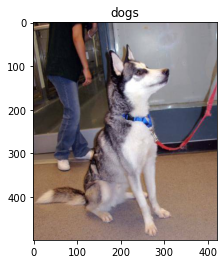

In [23]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()